In [1]:
#Import Statements
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "sans-serif"
import seaborn as sns

sns.set() # Setting seaborn as default style
sns.set_theme()

# declare global helpers
condition_values = ['0ms','10ms','400ms','10ms echo','400ms echo']
groupnames = [0,1,2,3,4]
browsernames = ["MSIE", "Firefox", "Safari", "Chrome", "Opera"]

In [2]:
# Columns below this comment are as follows:
# 1. Time results were received.
# 2. MD5 hash of participant's IP address.
# 3. Controller name.
# 4. Item number.
# 5. Element number.
# 6. Type.
# 7. Group.
# 8. Field name.
# 9. Field value.
df = pd.read_csv('../data/results_feedback_form.txt',
                 sep = ',',
                 comment='#', 
                 header=None,
                 names = ['time','hash','controller','item','element', 'type', 'group','field_name', 'value'],
                engine = 'python')

In [3]:
df.info()
print([*df])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1114 entries, 0 to 1113
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time        1114 non-null   int64  
 1   hash        1114 non-null   object 
 2   controller  1114 non-null   object 
 3   item        1114 non-null   int64  
 4   element     1114 non-null   int64  
 5   type        1114 non-null   object 
 6   group       0 non-null      float64
 7   field_name  1114 non-null   object 
 8   value       709 non-null    object 
dtypes: float64(1), int64(3), object(5)
memory usage: 78.5+ KB
['time', 'hash', 'controller', 'item', 'element', 'type', 'group', 'field_name', 'value']


In [4]:
df.tail(50)

,time,hash,controller,item,element,type,group,field_name,value
1064,1623157488,9f9f59ff918cae34af2178154fe2e40a,Form,1,0,intro,NaN,length,nein
1065,1623157488,9f9f59ff918cae34af2178154fe2e40a,Form,1,0,intro,NaN,breaks,nein
1066,1623157488,9f9f59ff918cae34af2178154fe2e40a,Form,1,0,intro,NaN,audioplayback,nein
1067,1623157488,9f9f59ff918cae34af2178154fe2e40a,Form,1,0,intro,NaN,external_factor,nein
1068,1623157488,9f9f59ff918cae34af2178154fe2e40a,Form,1,0,intro,NaN,_REACTION_TIME_,274023
1069,1623173905,b5e305411c66e3328d4e73b5c54f847a,Form,1,0,intro,NaN,fname,192
1070,1623173905,b5e305411c66e3328d4e73b5c54f847a,Form,1,0,intro,NaN,group,2
1071,1623173905,b5e305411c66e3328d4e73b5c54f847a,Form,1,0,intro,NaN,load_time,1
1072,1623173905,b5e305411c66e3328d4e73b5c54f847a,Form,1,0,intro,NaN,audioproblem,NaN
1073,1623173905,b5e305411c66e3328d4e73b5c54f847a,Form,1,0,intro,NaN,external_factor_description,NaN


In [5]:
#display all the genders
list(df[df['field_name'] == 'comment']['value'])

[nan,
 nan,
 nan,
 nan,
 nan,
 'checkpoints einbauen?',
 nan,
 nan,
 nan,
 nan,
 'unklar was Verzerrung wirklich bedeutet -> nur die starke Dopplung oder auch weniger auffällige "Echos"? Oder war das ein Tonqualitätsmangel...%0AUnklar wo ich hingucken soll. Muss ic auf das Kreuz/Video gucken oder daf ich die Bilder bei der Entschedng anschauen.',
 nan,
 nan,
 nan,
 nan,
 'Der Begriff "Verzerrungen" in Bezug auf die kurzen Clips war mir nicht ganz klar. evtl. wäre eine Vordefinition hilfreich gewesen ',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'Die Bilder unterschieden sich teilweise stark im Zeichenstil',
 'Einige der Instruktions-Texte waren oben deutlich abgeschnitten.%0ADas könnte vermutlich am meinem Bildschirmformat liegen (21:9)',
 nan,
 nan,
 nan,
 nan,
 "Ist es nicht zu einfach%2C dass das linke Bild immer zu erst erwähnt wurde und dann das rechte Bild. Man musste ja quasi nur warten%2C ob man das Adjektiv als 

In [6]:
list(df[df['field_name'] == 'audioproblem']['value'])

[nan,
 'abgelenkt%2C mit console gecheated',
 nan,
 'Kinder und Telefon',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'Es hat geklingelt%2C weil mein Burger geliefert wurde.',
 'dauerhaftes rauschen im Hintergrund.%0ADies nahm ich zuerst als Störgeräusch / Verzerrung wahr.%0ADas wird die Ergebnisse des Experiments verfälschen. Besonders wenn es mehreren Teilnehmern so geht.',
 nan,
 nan,
 nan,
 'Videos laden gar nicht in Safari%2C bei letzten zwei Fragen-Runden laden Videos nicht sofort%2C sondern brauchen einige Minuten (1-2)',
 'Handy%2C Konzentrationsabnahme im Laufe des Experiments',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'Erst hatte ich kein Ton%2C dann habe ich es nochmal gestartet und es hat funktioniert.',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'Beim ersten Versuch hat die Audiowiedergabe nicht funktioniert. Ein Wechsel des Browsers hat das Problem gelöst.',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,


In [7]:
list(df[df['field_name'] == 'image_clarity']['value'])

[nan,
 'Kasper und Clown%0ARitter und Wikinger',
 nan,
 nan,
 nan,
 'bäcker/koch',
 nan,
 nan,
 'nein',
 nan,
 'Koch - Bäcker (ähnliche Bilder) ',
 nan,
 nan,
 nan,
 nan,
 'Ja bei 2%2C3 hatte ich das Wort vergessen bzw war mir nicht mehr sicher welches Wort es war.',
 nan,
 nan,
 nan,
 nan,
 nan,
 'Der Prinz sah aus wie Robin Hood.',
 'Koch und Bäcker gleichzeitig waren sehr ähnlich',
 nan,
 'Matrose + Kapitän waren anfangs schwer zu unterscheiden',
 'Ja%2C bei Bäcker und Koch (wusste nicht wer wer sein soll)',
 nan,
 nan,
 nan,
 'Kasper ',
 nan,
 nan,
 'nein',
 nan,
 nan,
 nan,
 nan,
 nan,
 'Ja%2C einmal die Bilder von Koch und Bäcker und die Bilder von Matrose und Kaptain.',
 nan,
 nan,
 'Nein',
 nan,
 nan,
 nan,
 nan,
 'Koch/Bäcker',
 nan,
 nan,
 'Koch gegen Bäcker',
 nan,
 nan,
 nan,
 nan,
 nan,
 'Matrose und Kapitän waren schwer zuzuordnen und der Vater sah so jung aus%2C dass er schwer als Vater zu erkennen war',
 nan,
 nan,
 'Der Koch sah aus wie ein Bäcker%2C ich glaub das hatt

In [8]:
list(df[df['field_name'] == 'display']['value'])

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'nein',
 'Die Filmclips haben oft gestockt. ',
 'siehe oben ',
 nan,
 nan,
 nan,
 nan,
 'Manchmal (1-3 mal) wurden die Worte übersprungen. ',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'An einer Stelle zur Beurteilung der Synchronität von Video und Audio erschien statt der Ja/Nein Antwort Möglichkeit ein Bild mit zwei Figuren.',
 'nein',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'Nein',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'Audio und Videoclips wurden erst nach mehrmaligem Neuladen des Experiments angezeigt',
 nan,
 'siehe audiowiedergabe',
 nan,
 nan,
 nan,
 nan,
 'Wenn lange Texte auf dem Bildschirm waren%2C dann waren diese häufig oben und unten Abgeschnitten. (zB Enter um weiter zu gehen)%0AIch denke das lag daran das ich eine 2560x1440 Auflösung habe.',
 nan,
 nan,
 nan,
 'Ja%2C im Browser Safari. Daraufhin 

In [9]:
list(df[df['field_name'] == 'external_factor_description']['value'])

[nan,
 nan,
 'Eine Meldung meines laptops das ich die Seite nochmal laden solle da sie sehr viel Kapazietät braucht. Ich konnte es leider nicht weg klicken. (als Oberer dünner Balken)',
 nan,
 nan,
 'kinder %0Afrau',
 nan,
 nan,
 'Eine andere Person hat zwischendurch den Raum betreten.',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'Handy',
 nan,
 'Jemand ist in den Raum gekommen',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'Mein Mitbewohner hat mich zu einer langen Pause gezwungen',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'Ich habe vergessen%2C mein Handy stumm zu schalten und es hat während der Aufgabe vibriert.',
 nan,
 'Mein Mitbewohner ist die Treppe herunter gepoltert',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

## Breaks

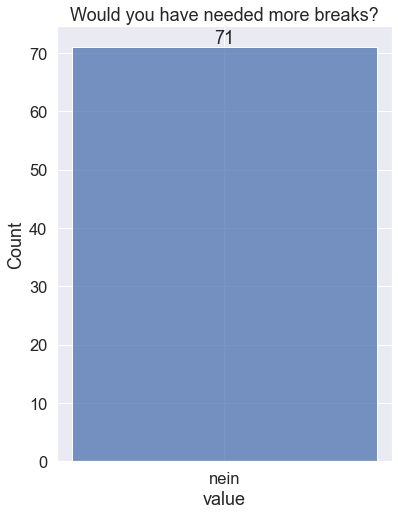

In [10]:
#display all the answers
list(df[df['field_name'] == 'breaks']['value'])
fig = plt.gcf()
fig.set_size_inches(6, 8)
sns.set(font_scale=1.5)

ax = sns.histplot(data = df[df['field_name'] == 'breaks'],x = 'value')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.title('Would you have needed more breaks?')

plt.savefig("gender_dist.png", dpi=300, bbox_inches='tight')

## Length

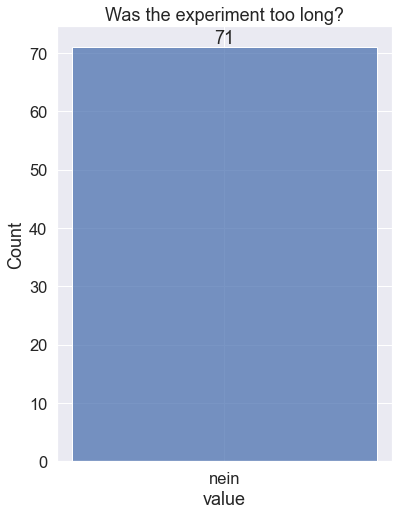

In [11]:
#display all the answers
list(df[df['field_name'] == 'breaks']['value'])
fig = plt.gcf()
fig.set_size_inches(6, 8)
sns.set(font_scale=1.5)

ax = sns.histplot(data = df[df['field_name'] == 'breaks'],x = 'value')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.title('Was the experiment too long?')

plt.savefig("gender_dist.png", dpi=300, bbox_inches='tight')